<a href="https://colab.research.google.com/github/amirNoori73/01-Deep-Learning-Course/blob/main/Second_Comparison_of_Hidden_Layers_(Adding_new_functions).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [82]:
x = np.arange(-80, 81, 0.5)
y = x**2 + 5*x + 3
y.shape

(322,)

In [83]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((257,), (65,), (257,), (65,))

# **Third Model**

In [84]:
model_3 = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=[1]),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(1)
])

In [131]:
optimizer = keras.optimizers.Adam(learning_rate=0.00001)
loss = keras.losses.MeanSquaredError()
metric = tf.metrics.Precision()
model_3.compile(loss=loss, optimizer=optimizer, metrics=[metric])

In [132]:
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True)

In [133]:
model_3.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_35 (Dense)                │ (None, 256)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 198,145 (774.00 KB)

 Trainable params: 198,145 (774.00 KB)

 Non-trainable params: 0 (0.00 B)

In [134]:
hist_3 = model_3.fit(x_train, y_train, epochs=100, batch_size=64, callbacks=[early_stopping], validation_data=(x_test, y_test))

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 364ms/step - loss: 829.7408 - precision_4: 1.0000 - val_loss: 326.7627 - val_precision_4: 1.0000
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 786.2672 - precision_4: 1.0000 - val_loss: 429.2650 - val_precision_4: 1.0000
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 609.5773 - precision_4: 1.0000 - val_loss: 385.8527 - val_precision_4: 1.0000
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 823.5609 - precision_4: 1.0000 - val_loss: 334.5421 - val_precision_4: 1.0000
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 895.0120 - precision_4: 1.0000 - val_loss: 384.4119 - val_precision_4: 1.0000
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 749.9379 - precision_4: 1.0000 - val_loss: 336.8744 - val_precision_4: 1.0000
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 721.0604 - precision_4: 1.0000 - val_loss: 357.9622 - val_precision_4: 1.0000
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/st

# **Comparison**

In [135]:
y_pred_3 = model_3.predict(x_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


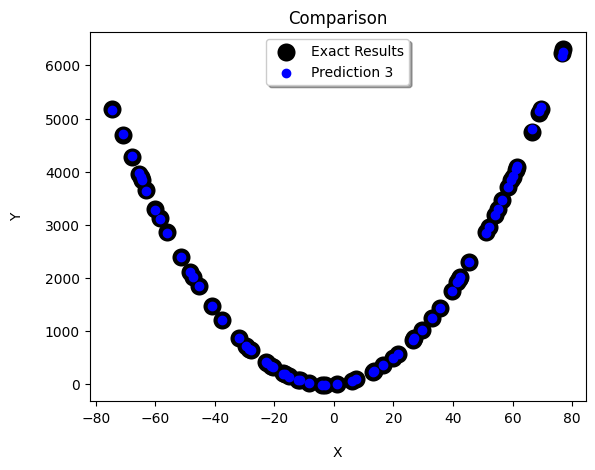

In [136]:
plt.scatter(x_test, y_test, color='black', linewidths=7)
plt.scatter(x_test, y_pred_3, color='blue')
plt.legend(['Exact Results', 'Prediction 3'], loc='upper center',
          fancybox=True, shadow=True, ncol=1)
plt.xlabel('X', labelpad=15)
plt.ylabel('Y', labelpad=15)
plt.title('Comparison')
plt.show()

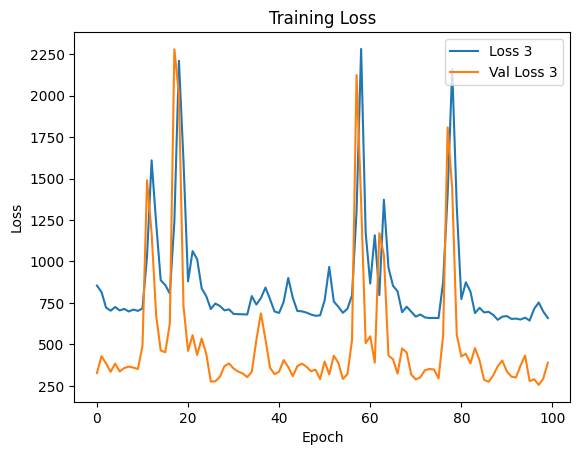

In [137]:
plt.plot(hist_3.history['loss'], label='Loss 3')
plt.plot(hist_3.history['val_loss'], label='Val Loss 3')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()